In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [30]:
data1=pd.read_csv("train.csv")
data1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
data=pd.read_csv("train.csv").as_matrix()
cls=DecisionTreeClassifier()

C:\Users\Amith\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [10]:
data[:1]

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [68]:
xtrain=data[:35000,1:]
train_lable=data[:35000,0]

In [69]:
train_lable[:20]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5],
      dtype=int64)

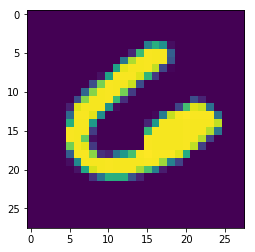

In [101]:
d=xtrain[1200]
d.shape=(28,28)
plt.imshow(d)

In [71]:
cls.fit(xtrain,train_lable)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
print(cls.predict([xtrain[1200]]))

[6]


In [73]:
p=cls.predict(xtrain)

In [74]:
p

array([1, 0, 1, ..., 7, 7, 0], dtype=int64)

In [75]:
train_lable

array([1, 0, 1, ..., 7, 7, 0], dtype=int64)

In [76]:
c=0
for i in range(0,len(p)):
    if train_lable[i]== p[i]:
        c=c+1
print(c)
        

35000


In [79]:
xtest=data[35000:,1:]
y=data[35000:,0]

In [80]:
q=cls.predict(xtest)
len(q)

7000

In [81]:
c=0
for i in range(0,len(q)):
    if y[i]== q[i]:
        c=c+1
print(c)
        

5994


In [82]:
z=pd.read_csv("test.csv").as_matrix()

C:\Users\Amith\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [84]:
predicted_classes = cls.predict(z)
predicted_classes = predicted_classes.reshape(-1,1)

In [85]:
submission_df = pd.DataFrame(predicted_classes)
submission_df.index.rename('ImageId', inplace = True)
submission_df.index+=1
cols = ['Label']
submission_df.columns = [i for i in cols]

In [86]:
#write file to csv output
submission_df.to_csv('submission1.csv')